In [1]:
#nativos
import os
import unicodedata

#terceros
import pandas as pd
import pymssql
import missingno as msno
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#propios
from utils_ficha import *

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  import sys


In [2]:
#conneciom
connection_b20 = pymssql.connect(host='10.10.33.92\SQL2008',
                             user='userweb',
                             port=1433,
                             password='$$W3BVPC2@17',
                             database='WEBVPC'
                            )

### Carga Ficha Conoceme

In [3]:
query_conoceme = """
    SELECT * FROM WEBBE_INFINITY_CONOCEME ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_b20
)
conoceme.head()

,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_INVERSION,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP
0,0010545047,Servicios,Metalmecánica,Proyectos,"La empresa brinda servicios de proyectos, inge...",Brinda un servicio diferenciado desde la ingen...,Fortalezas:\r\n- Cartera de clientes de buen c...,None,None,B30434,...,NaN,NaN,2020-11-09 00:00:00,None,0,0,NaN,NaN,2019.0,2006.0
1,0009808462,Comercio,Productos Marinos,No Aplica,Importador y comercializador de productos hidr...,Cliente mantiene productos vigentes para el me...,FORTALEZAS\r\n-\tCartera de clientes atomizada...,None,None,B36512,...,NaN,NaN,2020-10-05 01:43:00,Exterior,0,None,NaN,NaN,2017.0,2006.0
2,0010647003,Comercio,Textil y calzado,No Aplica,"Importación y comercialización de colorantes, ...",Laborotio quimico in house donde tratan los re...,"(F) Mas de 30 años en el negocio, existe suces...",None,None,B36183,...,NaN,NaN,2020-10-02 19:28:45,Exterior,0,None,NaN,NaN,2020.0,1986.0
3,0008740612,Agrícola y Ganadero,Real Estate,No Aplica,El Sr. Juan Carlos Li Morales forma parte del ...,Ubicación estratégica y demanda del alquiler d...,F: Amplia experiencia del accionista en los ne...,None,None,B37708,...,NaN,NaN,2020-10-02 12:22:46,None,0,None,NaN,NaN,2001.0,1995.0
4,0015994198,Comercio,Artículos diversos,No Aplica,Empresa fue constituida en Perú en el año 2017...,Cliente tiene exclusividad en varias líneas de...,Fortalezas: Grupo Titanio tiene más de 12 años...,None,None,B36045,...,NaN,NaN,2020-10-01 22:03:29,Exterior,0,None,NaN,NaN,NaN,NaN


### Carga Ficha COVID

In [4]:
query_covid = """
    SELECT * FROM WEBVPC_COVID19 ORDER BY FECHA_CREACION DESC
"""
covid = pd.read_sql(
   query_covid , connection_b20
)
covid.head()

,ID,ID_VISITA,COD_UNICO,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,FECHA_CREACION,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP
0,787,1019,0015994198,2020-10-01,1,1,2,2,NaN,Se realizaron reprogramaciones con obligacione...,...,2020-10-02,None,NaT,NaN,None,NaT,None,None,B29503,None
1,788,1020,0011627517,2020-09-18,1,1,2,1,17.0,La empresa ha implementado protocolos de segur...,...,2020-10-02,None,NaT,NaN,None,NaT,None,None,B35531,None
2,789,1021,0008740612,2020-09-23,2,1,2,2,NaN,Empresa evaluada del grupo: Corporación Litec....,...,2020-10-02,None,NaT,NaN,None,NaT,None,None,B6674,None
3,790,1022,0010647003,2020-10-01,1,1,2,2,NaN,Se reprogramó deuda con bancos (90 días). . De...,...,2020-10-02,None,NaT,NaN,None,NaT,None,None,B9804,None
4,779,1011,0014735808,2020-09-22,1,1,2,2,NaN,None,...,2020-10-01,None,NaT,NaN,None,NaT,None,None,B10813,None


In [55]:
covid.shape

(729, 74)

## ANALISIS

## >> CLientes unicos en ficha COVID

In [5]:
covid_unicos = set(covid['COD_UNICO'].unique())

'Hay {} clientes únicos de {} registros'.format(
    len(covid_unicos), covid.shape[0],
)

'Hay 729 clientes únicos de 758 registros'

In [6]:
conoceme_unicos = set(conoceme['COD_UNICO'].unique())

'Hay {} clientes únicos de {} registros'.format(
    len(conoceme_unicos), conoceme.shape[0],
)

'Hay 915 clientes únicos de 923 registros'

In [56]:
conoceme.shape[0]

915

In [57]:
covid.shape[0]

729

## >> ¿Cuantos clientes coinciden en ambas fichas y cuantos nó ?

In [7]:
'{} clientes tiene información en AMBAS FICHAS'.format(len(covid_unicos & conoceme_unicos))

'729 clientes tiene información en AMBAS FICHAS'

In [8]:
'{} clientes cuentan solo con ficha CONOCEME'.format(len(conoceme_unicos - covid_unicos))

'186 clientes cuentan solo con ficha CONOCEME'

In [9]:
'{} clientes cuentan solo con ficha COVID y no con ficha CONOCEME'.format(len(covid_unicos - conoceme_unicos))

'0 clientes cuentan solo con ficha COVID y no con ficha CONOCEME'

# ¿ AYUDA LA FICHA COVID A DETECTAR CLIENTES PREOCUPAN?

### >> 1- Indicar si la pandemia COVID-19, ha tenido un impacto negativo en la gestión / 13- Definir dentro de las siguientes 3 alternativas el grado de impacto negativo al COVID19 

#### Se intuye 1 = SI, 2 = NO

In [10]:
covid['PREGUNTA_1'] = covid['PREGUNTA_1'].apply(lambda _: 'SI' if str(_).strip() == '1' else 'NO')

In [11]:
pd.crosstab(
    covid['PREGUNTA_1'], covid['PREGUNTA_13']
)

PREGUNTA_13,alto,bajo,medio,sin impacto
PREGUNTA_1,,,,
NO,7,99,19,77
SI,107,181,257,11


## Comparación de preguntas relacionadas al IMPACTO COVID

#### OBJETIVO: Ver si guardan relación segpun lo expuesto por el cliente o si se trata de error de llenado acorde a lo observado

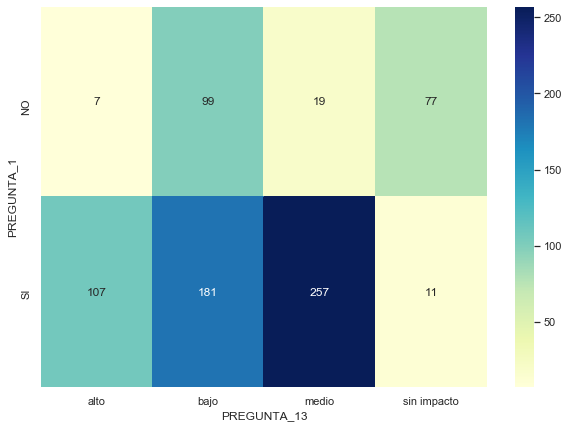

In [12]:
view_cat(covid, 'PREGUNTA_13', 'PREGUNTA_1')

#### NOTA: Se considerará con mayor peso la pregunta 13 donde el cliente toma una opción dentro de un rango, pero en consideracipon los casos donde hay controversía con la 1er pregunta

## >> Nos quedamos con un registro por cliente tomando como referencia las variables de tiempo

In [13]:
covid = covid.drop_duplicates(subset=['COD_UNICO'], keep='first')
conoceme = conoceme.drop_duplicates(subset=['COD_UNICO'], keep='first')

## >> Etiquetas validadas

##### Etiqueta 1

In [14]:
covid['PREGUNTA_14_1'].value_counts(dropna=False) # ESTRATEGIA

Mantener        539
Crecer           74
Feve             66
Reprogramar      23
NaN              15
Reperfilar        6
Refinanciar       4
Reprogramar       2
Name: PREGUNTA_14_1, dtype: int64

##### Etiqueta 2

In [15]:
covid['PREGUNTA_14_2'].value_counts(dropna=False) # FEVE

Sin FEVE        338
Seguir          140
Seguir COVID    129
NaN              73
Reducir          26
Garantizar       12
Salir            11
Name: PREGUNTA_14_2, dtype: int64

##### Etiqueta 3

In [16]:
covid['PREGUNTA_14_1'] = covid['PREGUNTA_14_1'].fillna('Sin categoria')
covid['PREGUNTA_14_1'] = covid['PREGUNTA_14_1'].apply(lambda _: _.strip().upper())

covid['PREGUNTA_14_2'] = covid['PREGUNTA_14_2'].fillna('Sin categoria')
covid['PREGUNTA_14_2'] = covid['PREGUNTA_14_2'].apply(lambda _: _.strip().upper())

pd.crosstab(
    covid['PREGUNTA_14_1'], covid['PREGUNTA_14_2']
)

PREGUNTA_14_2,GARANTIZAR,REDUCIR,SALIR,SEGUIR,SEGUIR COVID,SIN CATEGORIA,SIN FEVE
PREGUNTA_14_1,,,,,,,
CRECER,1,0,0,14,4,10,45
FEVE,2,12,7,17,27,0,1
MANTENER,8,6,1,106,78,48,292
REFINANCIAR,0,1,3,0,0,0,0
REPERFILAR,0,0,0,0,6,0,0
REPROGRAMAR,1,7,0,3,14,0,0
SIN CATEGORIA,0,0,0,0,0,15,0


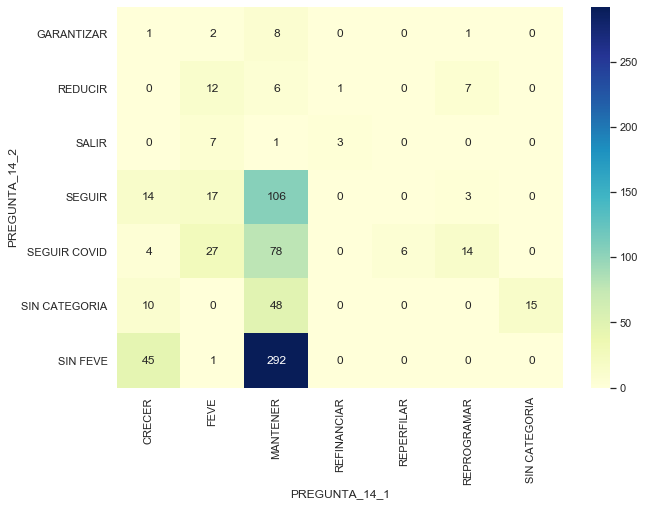

In [17]:
view_cat(covid, 'PREGUNTA_14_1', 'PREGUNTA_14_2', percent=False) 

## >> Validación de importnacia de la pregunta: 2_1 ¿Se encuentra actualmente operando?

In [18]:
covid['PREGUNTA_2_1'].value_counts(dropna=False)

1    703
2     26
Name: PREGUNTA_2_1, dtype: int64

#### En porcentaje

In [19]:
covid['PREGUNTA_2_1'].value_counts(dropna=False, normalize=True)

1    0.964335
2    0.035665
Name: PREGUNTA_2_1, dtype: float64

In [20]:
covid['PREGUNTA_2_1'] = covid['PREGUNTA_2_1'].apply(lambda _: 'SI' if str(_).strip() == '1' else 'NO')

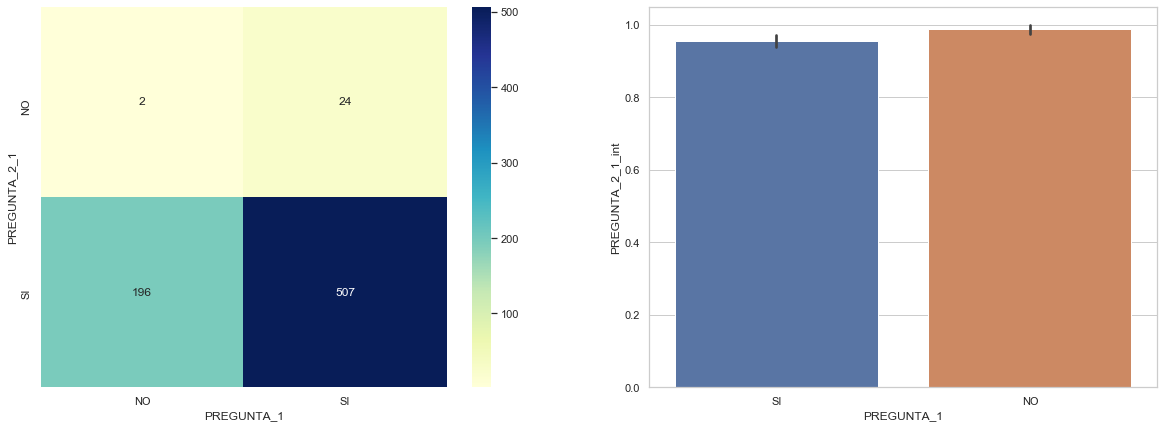

In [21]:
view_cat2(covid, 'PREGUNTA_1','PREGUNTA_2_1', percent=False)

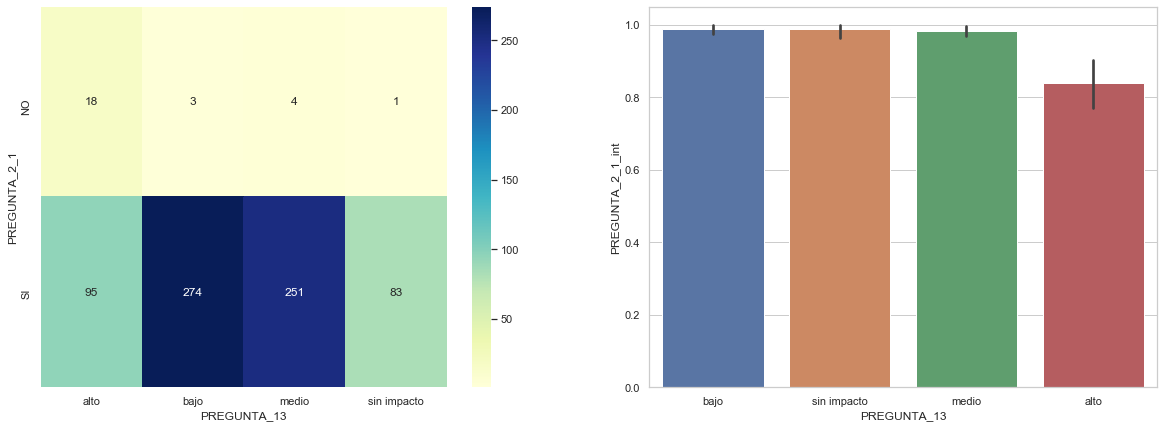

In [22]:
view_cat2(covid, 'PREGUNTA_13','PREGUNTA_2_1')

#### Cruce con las variables fijas 

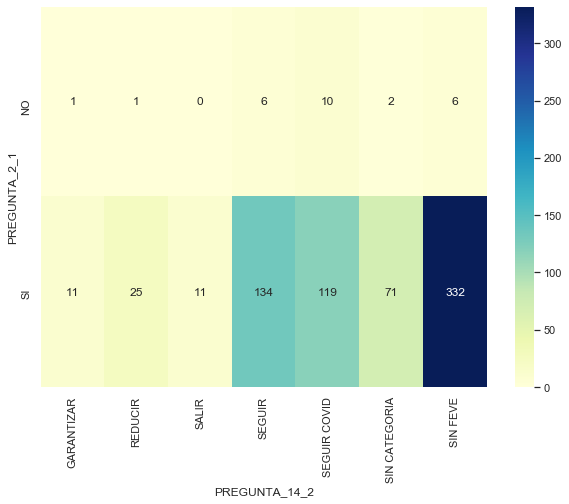

In [24]:
view_cat(covid, 'PREGUNTA_14_2', 'PREGUNTA_2_1',percent=False)

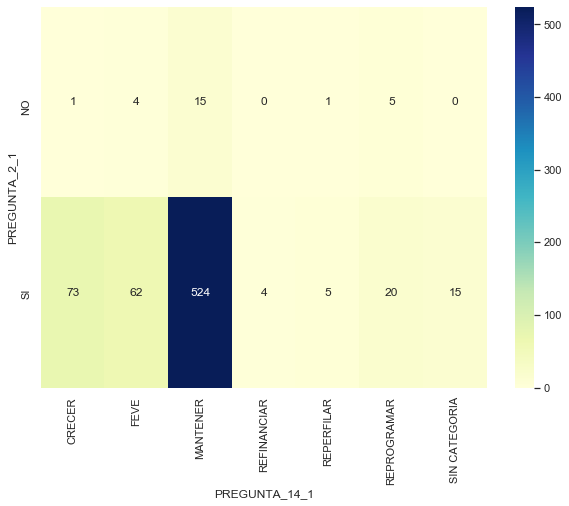

In [25]:
view_cat(covid, 'PREGUNTA_14_1', 'PREGUNTA_2_1',percent=False)

## >> Validación de importnacia de la pregunta: 2_3 ¿Redujo el personal?, ¿En que porcentaje?

In [26]:
covid['PREGUNTA_2_3_2'].dtype

dtype('float64')

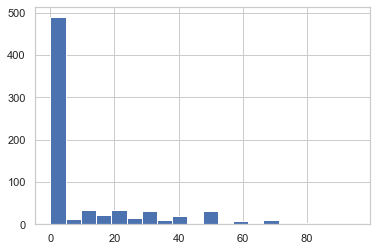

In [28]:
covid['PREGUNTA_2_3_2'] = covid['PREGUNTA_2_3_2'].fillna(0.0)
covid['PREGUNTA_2_3_2'].hist(bins=20)

In [41]:
def view_numeric(data, col_init, col_out, **kwargs):
    color_label = kwargs.get('color_label', 'black')
    bins = kwargs.get('bins', 3)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.violinplot(x=col_out, y=col_init, data=data, ax=axes[0])
    #legend_list = []
    #col_out_int = col_out + '_int'
    #data[col_out_int] = data[col_out].apply(lambda _: 1 if _ == 'SI' else 0)
    
    #for opt in data[col_out].unique():
    #    sns.kdeplot(data[data[col_out_int] == opt][col_init], ax=axes[1], shade=True)
    #    legend_list.append(opt)
    #plt.legend(legend_list)

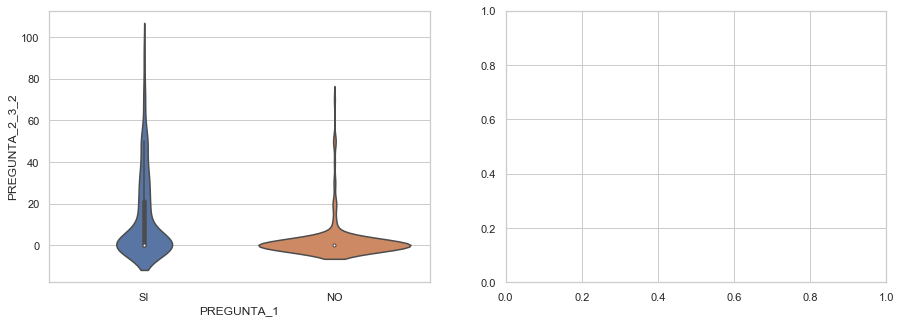

In [42]:
view_numeric(covid, 'PREGUNTA_2_3_2', 'PREGUNTA_1')

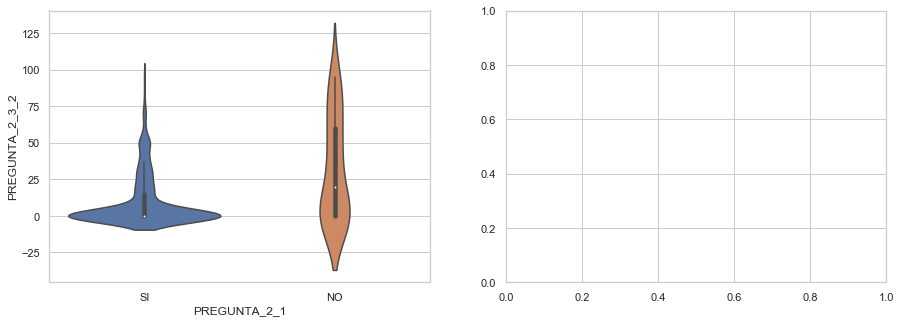

In [43]:
view_numeric(covid, 'PREGUNTA_2_3_2', 'PREGUNTA_2_1')

In [46]:
covid['PREGUNTA_2_2'] = covid['PREGUNTA_2_2'].apply(lambda _: 'SI' if str(_).strip() == '1' else 'NO')

covid['OPERANDO_SUSPENSION'] = covid['PREGUNTA_2_1'].astype(str) + '_' +covid['PREGUNTA_2_2'].astype(str)
covid['OPERANDO_SUSPENSION'].head()

0    SI_NO
1    SI_NO
2    SI_NO
3    SI_NO
4    SI_NO
Name: OPERANDO_SUSPENSION, dtype: object

## COMBINACION  (SIGUES_OPERANDO) _ (SUSPENSION_LABORES)   VS   PORCENTAJE DE REDUCCION DE PERSONAL

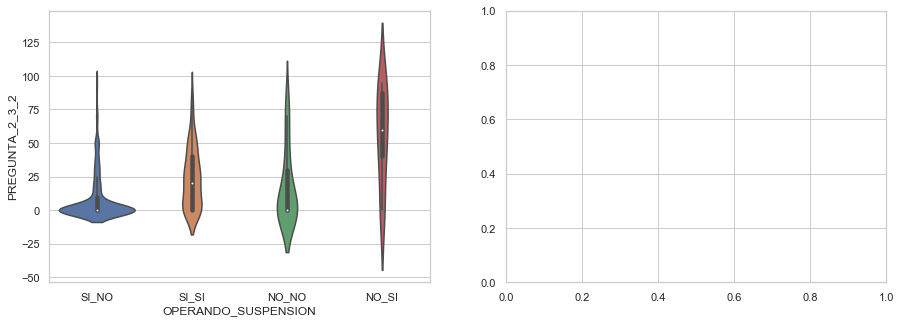

In [48]:
view_numeric(covid, 'PREGUNTA_2_3_2', 'OPERANDO_SUSPENSION')

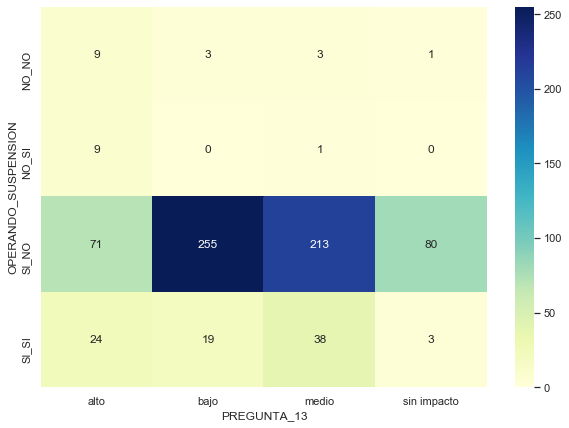

In [50]:
view_cat(covid, 'PREGUNTA_13', 'OPERANDO_SUSPENSION')

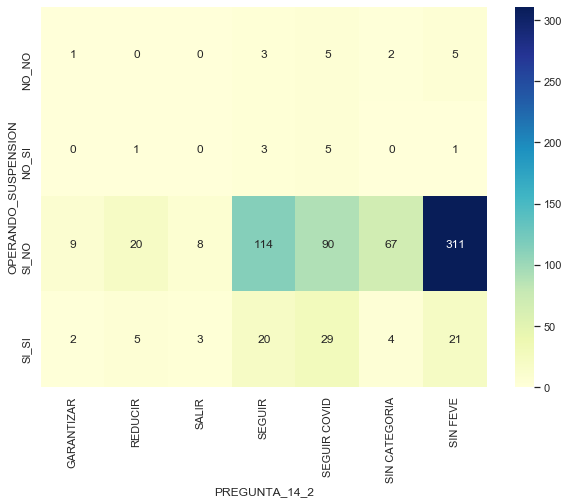

In [58]:
view_cat(covid, 'PREGUNTA_14_2', 'OPERANDO_SUSPENSION')

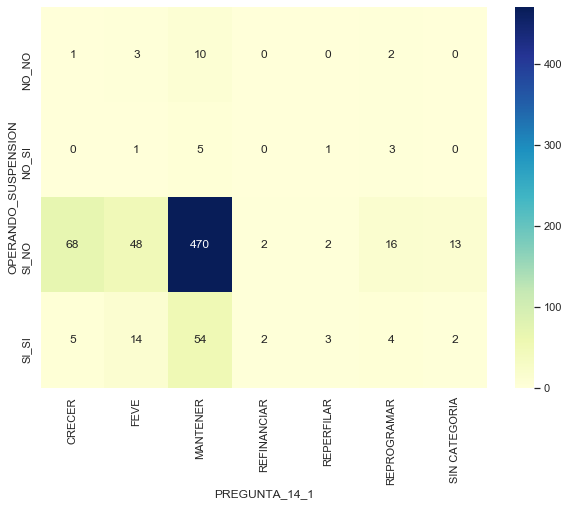

In [59]:
view_cat(covid, 'PREGUNTA_14_1', 'OPERANDO_SUSPENSION')

## >> Validación de importnacia de la pregunta: 4 ¿En qué porcentaje se ha reducido su ingreso mensual en lo que va del 2020?

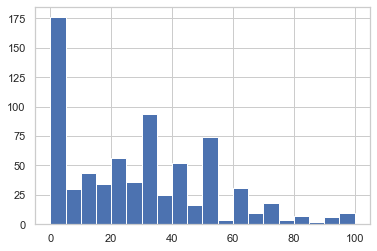

In [51]:
covid['PREGUNTA_4'] = covid['PREGUNTA_4'].fillna(0.0)
covid['PREGUNTA_4'].hist(bins=20)

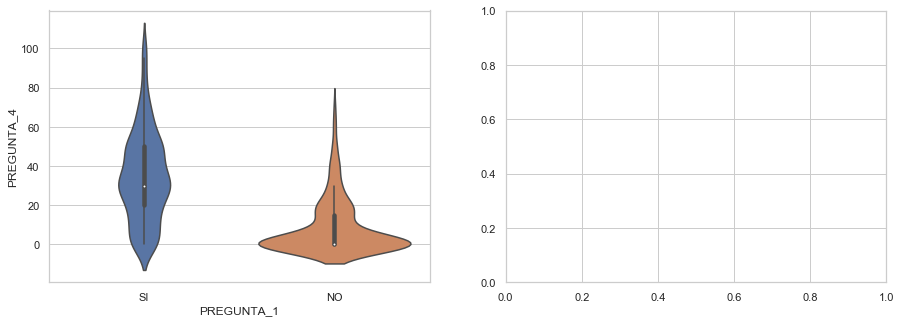

In [52]:
view_numeric(covid, 'PREGUNTA_4', 'PREGUNTA_1')

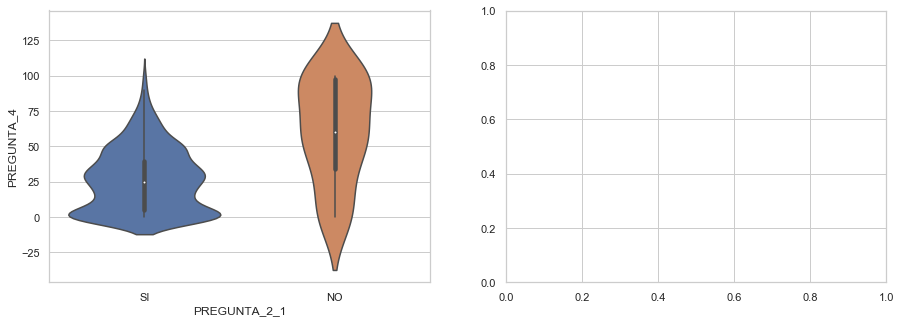

In [53]:
view_numeric(covid, 'PREGUNTA_4', 'PREGUNTA_2_1')

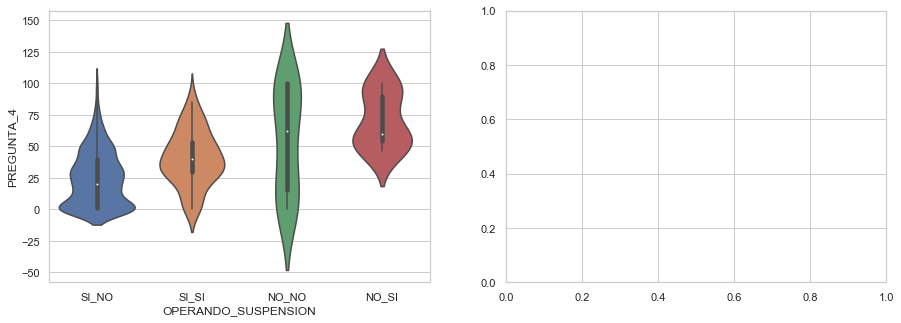

In [54]:
view_numeric(covid, 'PREGUNTA_4', 'OPERANDO_SUSPENSION')